In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense                       #The Dense layer is a fully connected layer, which is a type of neural network layer where each neuron is connected to every neuron in the next layer.
from keras.optimizers import Adam                    #Adam is an optimization algorithm commonly used for training neural networks.
from keras.utils import to_categorical              #This function is often used to convert class labels to one-hot encoded vectors.
from keras.layers import Dropout, Flatten           #Dropout is a regularization technique that helps prevent overfitting, and Flatten is used to flatten the input data before passing it to the next layer.
from keras.layers import Conv2D, MaxPooling2D         #Used for image processing task
import cv2                                            
from sklearn.model_selection import train_test_split
import pickle                                         #used for saving and loading machine learning models.
import os
import pandas as pd
import random
from keras.preprocessing.image import ImageDataGenerator            #This class is used for real-time data augmentation during model training, particularly in the context of image data.

In [2]:
path = "Dataset" 
labelFile = 'labels.csv' 
batch_size_val=32 
epochs_val=10
imageDimesions = (32,32,3)
testRatio = 0.2    
validationRatio = 0.2 

In [3]:
count = 0
images = []
classNo = []
myList = os.listdir(path)
print("Total Classes Detected:",len(myList))
noOfClasses=len(myList)
print("Importing Classes.....")
for x in range (0,len(myList)):
    myPicList = os.listdir(path+"/"+str(count))
    for y in myPicList:
        curImg = cv2.imread(path+"/"+str(count)+"/"+y)
        images.append(curImg)
        classNo.append(count)
    print(count, end =" ")
    count +=1
print(" ")
images = np.array(images)
classNo = np.array(classNo)

Total Classes Detected: 43
Importing Classes.....
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42  


In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, classNo, test_size=testRatio)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validationRatio)

In [5]:
print("Data Shapes")
print("Train",end = "");print(X_train.shape,y_train.shape)
print("Validation",end = "");print(X_validation.shape,y_validation.shape)
print("Test",end = "");print(X_test.shape,y_test.shape)

Data Shapes
Train(22271, 32, 32, 3) (22271,)
Validation(5568, 32, 32, 3) (5568,)
Test(6960, 32, 32, 3) (6960,)


In [6]:
data=pd.read_csv(labelFile)
print("data shape ",data.shape,type(data))

data shape  (43, 2) <class 'pandas.core.frame.DataFrame'>


In [7]:
num_of_samples = []
cols = 5
num_classes = noOfClasses

In [8]:
def grayscale(img):                              #Converts the input image to grayscale 
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    return img
def equalize(img):                              #Applies histogram equalization to the input image
    img =cv2.equalizeHist(img)             #Histogram equalization enhances the contrast of an image by redistributing the intensity values.
    return img
def preprocessing(img):
    img = grayscale(img)     
    img = equalize(img)      
    img = img/255             #normalizes the pixel values to be in the range [0, 1] by dividing by 255.
    return img

In [9]:
X_train=np.array(list(map(preprocessing,X_train)))  
X_validation=np.array(list(map(preprocessing,X_validation)))
X_test=np.array(list(map(preprocessing,X_test)))

In [10]:
#The original shape of each image in X_train is assumed to be (height, width), and it is reshaped to (height, width, 1) to indicate that there is one channel (grayscale).
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],X_train.shape[2],1)
X_validation=X_validation.reshape(X_validation.shape[0],X_validation.shape[1],X_validation.shape[2],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],X_test.shape[2],1)

In [11]:
#ImageDataGenerator is used to perform data augmentation on the training dataset (X_train and y_train). 
#Data augmentation is a technique used to artificially increase the size of the training dataset by applying various transformations to the existing images.
dataGen= ImageDataGenerator(width_shift_range=0.1,   
                            height_shift_range=0.1,
                            zoom_range=0.2,  
                            shear_range=0.1,  
                            rotation_range=10)  
dataGen.fit(X_train)
batches= dataGen.flow(X_train,y_train,batch_size=20)
X_batch,y_batch = next(batches)

In [12]:
y_train = to_categorical(y_train,noOfClasses)
y_validation = to_categorical(y_validation,noOfClasses)
y_test = to_categorical(y_test,noOfClasses)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 60)        1560      
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 60)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 30)        16230     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 30)          8130      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 30)          0         
 g2D)                                                   

C:\Users\dell\AppData\Local\Temp\ipykernel_3056\2422212154.py:21: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)


Epoch 1/10



695/695 [==============================] - 115s 159ms/step - loss: 2.4389 - accuracy: 0.3127 - val_loss: 0.7443 - val_accuracy: 0.7922
Epoch 2/10
695/695 [==============================] - 110s 158ms/step - loss: 1.1767 - accuracy: 0.6418 - val_loss: 0.3072 - val_accuracy: 0.9291
Epoch 3/10
695/695 [==============================] - 110s 158ms/step - loss: 0.8048 - accuracy: 0.7559 - val_loss: 0.1991 - val_accuracy: 0.9429
Epoch 4/10
695/695 [==============================] - 110s 158ms/step - loss: 0.6205 - accuracy: 0.8099 - val_loss: 0.1508 - val_accuracy: 0.9655
Epoch 5/10
695/695 [==============================] - 111s 160ms/step - loss: 0.5208 - accuracy: 0.8361 - val_loss: 0.0974 - val_accuracy: 0.9732
Epoch 6/10
695/695 [==============================] - 110s 158ms/step - loss: 0.4480 - accuracy: 0.8602 - val_loss: 0.0809 - val_accuracy: 0.9786
Epoch 7/10
695/695 [==============================] - 111s 159ms/step - loss: 0.3890 - accuracy: 0.8793 - val_loss: 0.0761 - val_accura

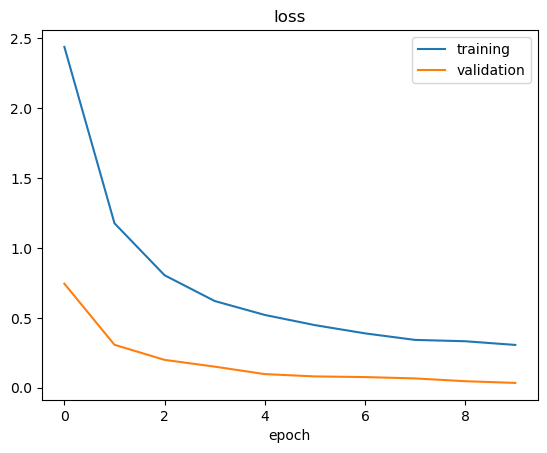

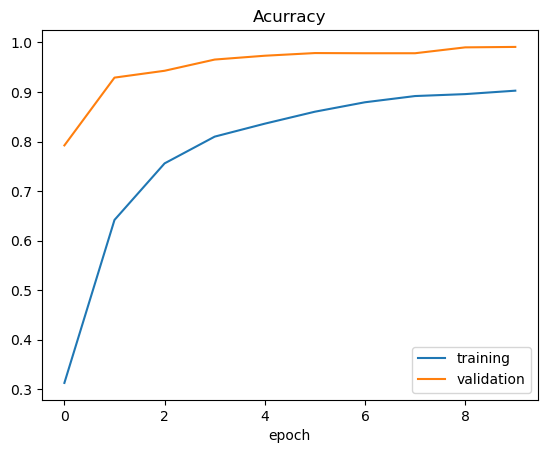

Test Score: 0.034609220921993256
Test Accuracy: 0.990517258644104


C:\Users\dell\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [13]:
def myModel():
    model= Sequential()                #Creates a new Sequential model which is a linear stack of layers.
    model.add((Conv2D(60,(5,5),input_shape=(imageDimesions[0],imageDimesions[1],1),activation='relu')))  # ADDING MORE CONVOLUTION LAYERS = LESS FEATURES BUT CAN CAUSE ACCURACY TO INCREASE
    model.add((Conv2D(60, (5,5), activation='relu')))         #Adds another 2D convolutional layer with 60 filters, each of size 5x5.
    model.add(MaxPooling2D(pool_size=(2,2)))                 #Adds a max-pooling layer with a 2x2 pool size. Max-pooling reduces the spatial dimensions of the input.
 
    model.add((Conv2D(30, (3,3),activation='relu')))        #Adds another 2D convolutional layer with 30 filters, each of size 3x3.
    model.add((Conv2D(30, (3,3), activation='relu')))
    model.add(MaxPooling2D(pool_size=(2,2)))              #Adds another max-pooling layer with a 2x2 pool size.
    model.add(Dropout(0.5))             #Adds a dropout layer with a dropout rate of 0.5, which helps prevent overfitting by randomly setting a fraction of input units to zero during training.
 
    model.add(Flatten())          #Adds a flattening layer to flatten the input before passing it to the dense layers.
    model.add(Dense(500,activation='relu'))   #Adds a fully connected dense layer with 500 neurons.
    model.add(Dropout(0.5))            #Adds another dropout layer with a dropout rate of 0.5.
    model.add(Dense(noOfClasses,activation='softmax')) 
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
    return model
 
model = myModel()
print(model.summary())
history=model.fit_generator(dataGen.flow(X_train,y_train,batch_size=batch_size_val),steps_per_epoch=len(X_train)//32,epochs=epochs_val,validation_data=(X_validation,y_validation),shuffle=1)
 
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('loss')
plt.xlabel('epoch')
plt.figure(2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Acurracy')
plt.xlabel('epoch')
plt.show()
score =model.evaluate(X_test,y_test,verbose=0)
print('Test Score:',score[0])
print('Test Accuracy:',score[1])
 
model.save("model.h5")